30N to 60N sst per month

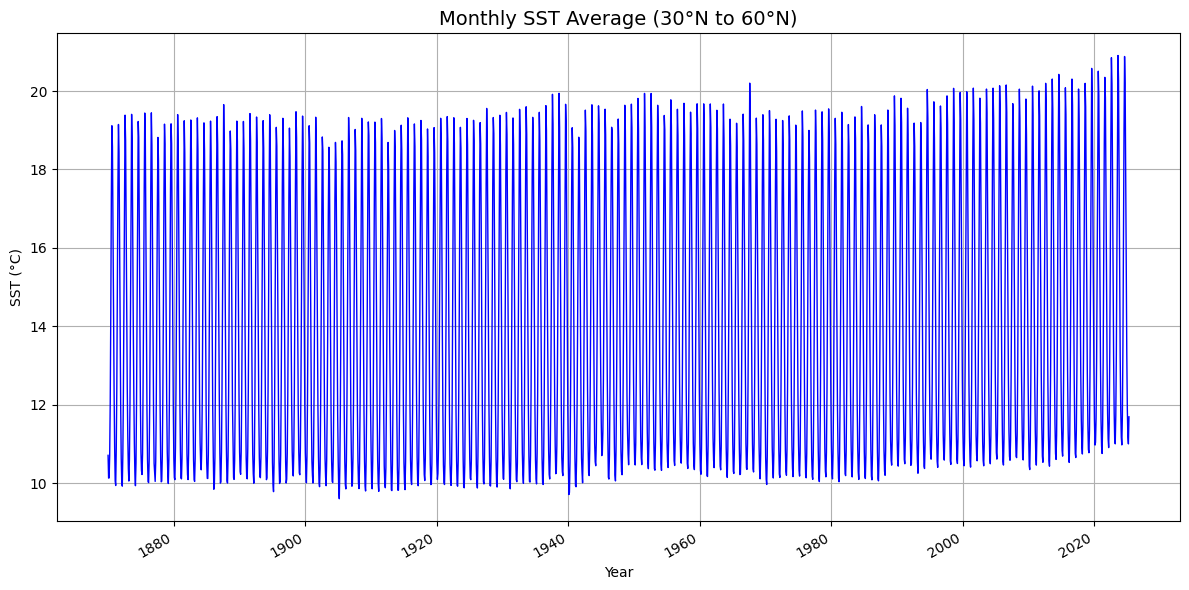

In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

file_path = '/Users/yutanzhang/Desktop/SST/HadISST_sst.nc'
ds = nc.Dataset(file_path)

sst_raw = ds.variables['sst'][:]
lat = ds.variables['latitude'][:]
lon = ds.variables['longitude'][:]
time = ds.variables['time']
time_units = time.units
calendar = getattr(time, 'calendar', 'standard')

dates_raw = nc.num2date(time[:], units=time_units, calendar=calendar)
dates = np.array([datetime(d.year, d.month, d.day) for d in dates_raw])

fill_value = getattr(ds.variables['sst'], '_FillValue', 1e20)
sst = np.ma.masked_where((sst_raw == fill_value) | (sst_raw > 1e10) | (sst_raw < -10), sst_raw)

lat_mask = (lat >= 30) & (lat <= 60)
sst = sst[:, lat_mask, :]
lat = lat[lat_mask]

deg_to_rad = np.pi / 180.0
lat_grid, lon_grid = np.meshgrid(lat, lon, indexing='ij')
lat_abs = np.abs(lat_grid)
weights = (np.sin((lat_abs + 0.5) * deg_to_rad) - np.sin((lat_abs - 0.5) * deg_to_rad)) / 720

global_sst_monthly = np.empty(sst.shape[0])
for t in range(sst.shape[0]):
    sst_t = sst[t, :, :]
    w_t = np.ma.array(weights, mask=sst_t.mask)
    if np.sum(~w_t.mask) < 10:
        global_sst_monthly[t] = np.nan
    else:
        w_t /= np.sum(w_t)
        global_sst_monthly[t] = np.ma.average(sst_t, weights=w_t)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(dates, global_sst_monthly, color='blue', linewidth=1)
ax.set_title('Monthly SST Average (30°N to 60°N)', fontsize=14)
ax.set_xlabel('Year')
ax.set_ylabel('SST (°C)')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
fig.autofmt_xdate()
ax.grid(True)
plt.tight_layout()
plt.show()

ds.close()

30N to 60N sst per year

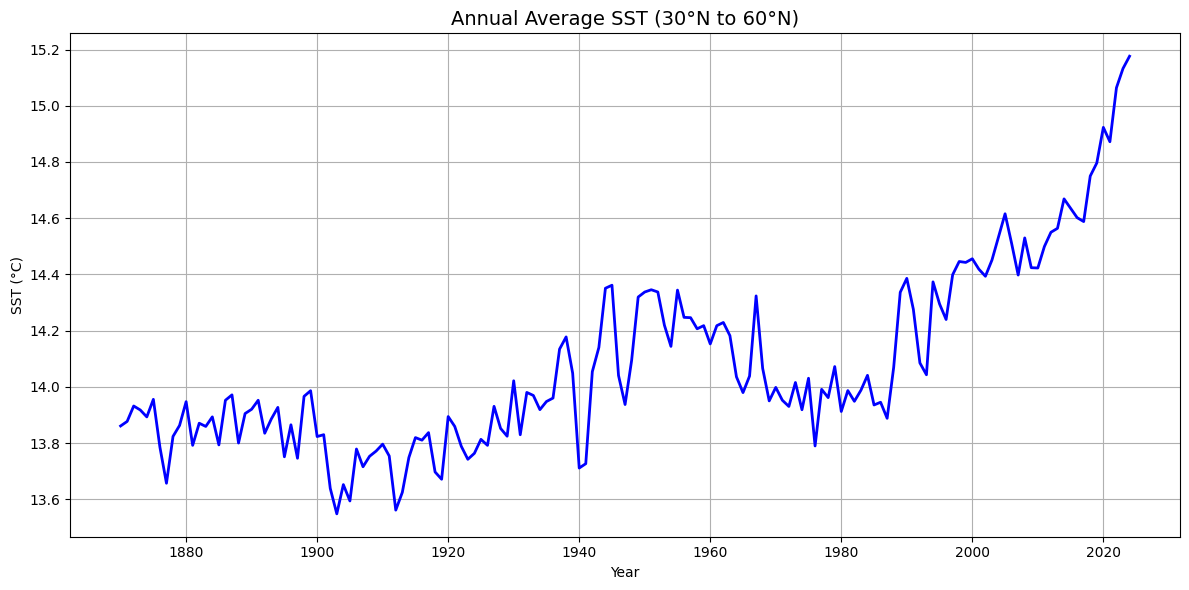

In [2]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

file_path = '/Users/yutanzhang/Desktop/SST/HadISST_sst.nc'
ds = nc.Dataset(file_path)

sst_raw = ds.variables['sst'][:]
lat = ds.variables['latitude'][:]
lon = ds.variables['longitude'][:]
time = ds.variables['time']
time_units = time.units
calendar = getattr(time, 'calendar', 'standard')

dates_raw = nc.num2date(time[:], units=time_units, calendar=calendar)
dates = np.array([datetime(d.year, d.month, d.day) for d in dates_raw])
years = np.array([d.year for d in dates])

fill_value = getattr(ds.variables['sst'], '_FillValue', 1e20)
sst = np.ma.masked_where((sst_raw == fill_value) | (sst_raw > 1e10) | (sst_raw < -10), sst_raw)

lat_mask = (lat >= 30) & (lat <= 60)
sst = sst[:, lat_mask, :]
lat = lat[lat_mask]

deg_to_rad = np.pi / 180.0
lat_grid, lon_grid = np.meshgrid(lat, lon, indexing='ij')  # (lat, lon)
lat_abs = np.abs(lat_grid)
weights = (np.sin((lat_abs + 0.5) * deg_to_rad) - np.sin((lat_abs - 0.5) * deg_to_rad)) / 720

global_sst_monthly = np.empty(sst.shape[0])
for t in range(sst.shape[0]):
    sst_t = sst[t, :, :]
    w_t = np.ma.array(weights, mask=sst_t.mask)
    if np.sum(~w_t.mask) < 10:
        global_sst_monthly[t] = np.nan
    else:
        w_t /= np.sum(w_t)
        global_sst_monthly[t] = np.ma.average(sst_t, weights=w_t)

unique_years = np.arange(years.min(), years.max() + 1)
global_sst_annual = []

for y in unique_years:
    mask = (years == y) & ~np.isnan(global_sst_monthly)
    if np.sum(mask) >= 6:
        avg = np.nanmean(global_sst_monthly[mask])
    else:
        avg = np.nan
    global_sst_annual.append(avg)

global_sst_annual = np.array(global_sst_annual)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(unique_years, global_sst_annual, color='blue', linewidth=2)
ax.set_title('Annual Average SST (30°N to 60°N)', fontsize=14)
ax.set_xlabel('Year')
ax.set_ylabel('SST (°C)')
ax.grid(True)
plt.tight_layout()
plt.show()

ds.close()

30S to 60S sst per month

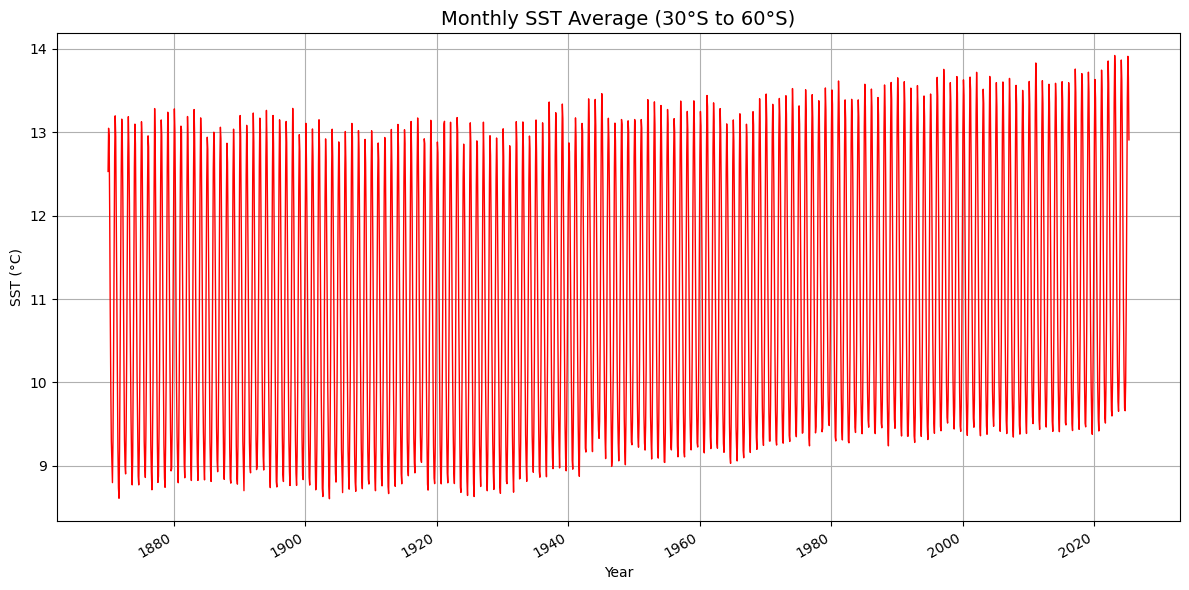

In [10]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

file_path = '/Users/yutanzhang/Desktop/SST/HadISST_sst.nc'
ds = nc.Dataset(file_path)

sst_raw = ds.variables['sst'][:]
lat = ds.variables['latitude'][:]
lon = ds.variables['longitude'][:]
time = ds.variables['time']
time_units = time.units
calendar = getattr(time, 'calendar', 'standard')

dates_raw = nc.num2date(time[:], units=time_units, calendar=calendar)
dates = np.array([datetime(d.year, d.month, d.day) for d in dates_raw])

fill_value = getattr(ds.variables['sst'], '_FillValue', 1e20)
sst = np.ma.masked_where((sst_raw == fill_value) | (sst_raw > 1e10) | (sst_raw < -10), sst_raw)

lat_mask = (lat <= -30) & (lat >= -60)
sst = sst[:, lat_mask, :]
lat = lat[lat_mask]

deg_to_rad = np.pi / 180.0
lat_grid, lon_grid = np.meshgrid(lat, lon, indexing='ij')
lat_abs = np.abs(lat_grid)
weights = (np.sin((lat_abs + 0.5) * deg_to_rad) - np.sin((lat_abs - 0.5) * deg_to_rad)) / 720

global_sst_monthly = np.empty(sst.shape[0])
for t in range(sst.shape[0]):
    sst_t = sst[t, :, :]
    w_t = np.ma.array(weights, mask=sst_t.mask)
    if np.sum(~w_t.mask) < 10:
        global_sst_monthly[t] = np.nan
    else:
        w_t /= np.sum(w_t)
        global_sst_monthly[t] = np.ma.average(sst_t, weights=w_t)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(dates, global_sst_monthly, color='red', linewidth=1)
ax.set_title('Monthly SST Average (30°S to 60°S)', fontsize=14)
ax.set_xlabel('Year')
ax.set_ylabel('SST (°C)')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
fig.autofmt_xdate()
ax.grid(True)
plt.tight_layout()
plt.show()

ds.close()

30S to 60S sst per year

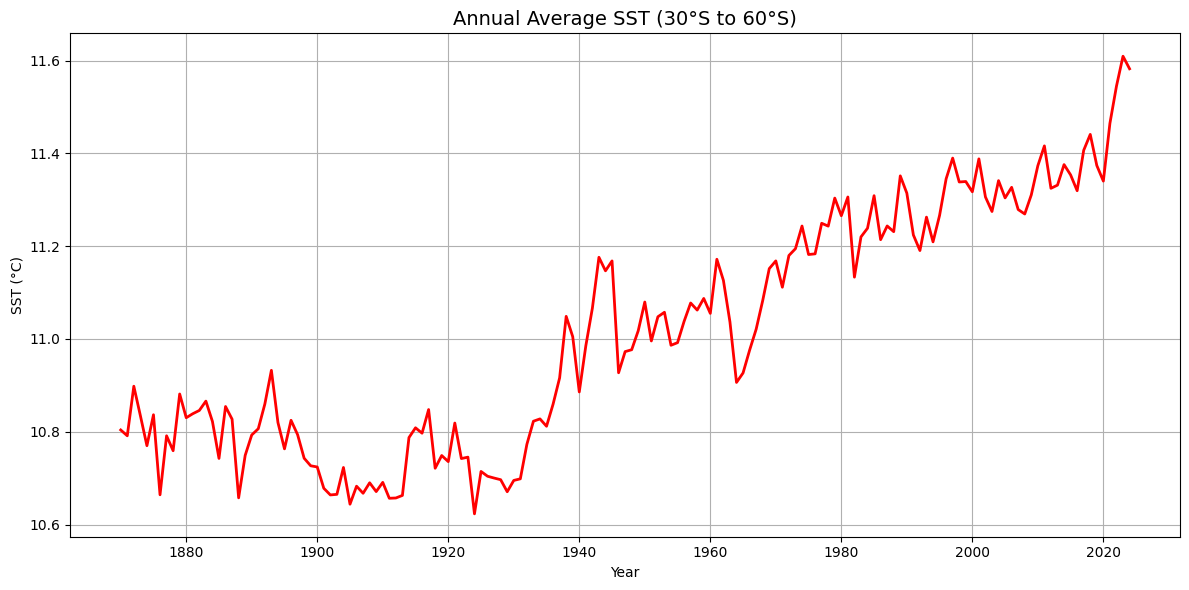

In [12]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

file_path = '/Users/yutanzhang/Desktop/SST/HadISST_sst.nc'
ds = nc.Dataset(file_path)

sst_raw = ds.variables['sst'][:]
lat = ds.variables['latitude'][:]
lon = ds.variables['longitude'][:]
time = ds.variables['time']
time_units = time.units
calendar = getattr(time, 'calendar', 'standard')

dates_raw = nc.num2date(time[:], units=time_units, calendar=calendar)
dates = np.array([datetime(d.year, d.month, d.day) for d in dates_raw])
years = np.array([d.year for d in dates])

fill_value = getattr(ds.variables['sst'], '_FillValue', 1e20)
sst = np.ma.masked_where((sst_raw == fill_value) | (sst_raw > 1e10) | (sst_raw < -10), sst_raw)

lat_mask = (lat <= -30) & (lat >= -60)
sst = sst[:, lat_mask, :]
lat = lat[lat_mask]

deg_to_rad = np.pi / 180.0
lat_grid, lon_grid = np.meshgrid(lat, lon, indexing='ij')  # (lat, lon)
lat_abs = np.abs(lat_grid)
weights = (np.sin((lat_abs + 0.5) * deg_to_rad) - np.sin((lat_abs - 0.5) * deg_to_rad)) / 720

global_sst_monthly = np.empty(sst.shape[0])
for t in range(sst.shape[0]):
    sst_t = sst[t, :, :]
    w_t = np.ma.array(weights, mask=sst_t.mask)
    if np.sum(~w_t.mask) < 10:
        global_sst_monthly[t] = np.nan
    else:
        w_t /= np.sum(w_t)
        global_sst_monthly[t] = np.ma.average(sst_t, weights=w_t)

unique_years = np.arange(years.min(), years.max() + 1)
global_sst_annual = []

for y in unique_years:
    mask = (years == y) & ~np.isnan(global_sst_monthly)
    if np.sum(mask) >= 6:
        avg = np.nanmean(global_sst_monthly[mask])
    else:
        avg = np.nan
    global_sst_annual.append(avg)

global_sst_annual = np.array(global_sst_annual)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(unique_years, global_sst_annual, color='red', linewidth=2)
ax.set_title('Annual Average SST (30°S to 60°S)', fontsize=14)
ax.set_xlabel('Year')
ax.set_ylabel('SST (°C)')
ax.grid(True)
plt.tight_layout()
plt.show()

ds.close()

30S to 60S and 30N to 60N sst per month

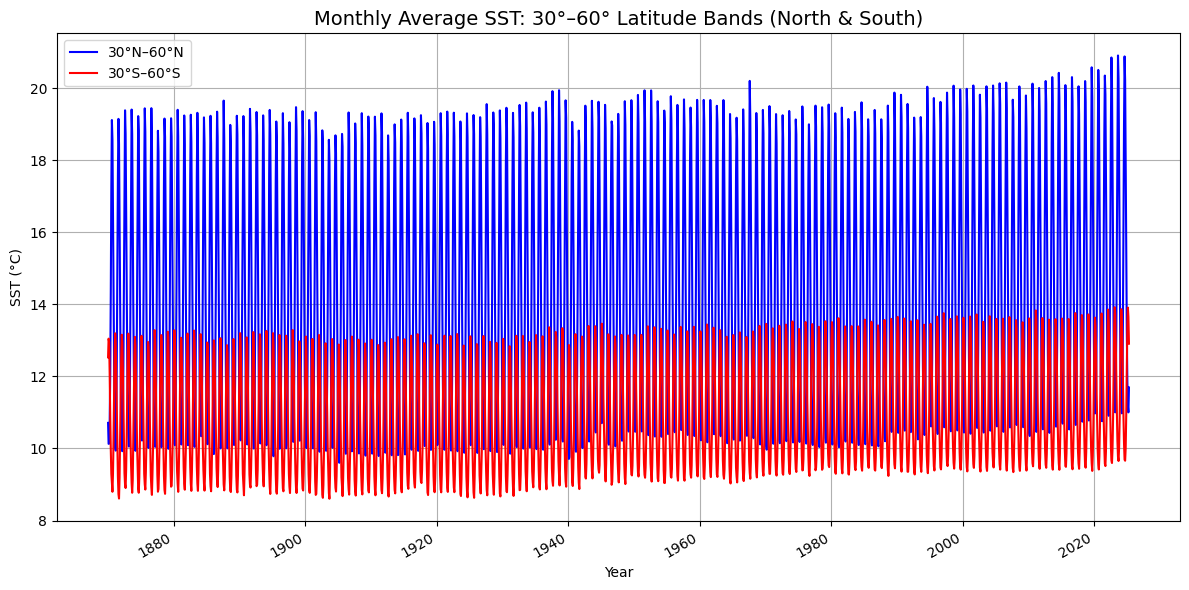

In [11]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

file_path = '/Users/yutanzhang/Desktop/SST/HadISST_sst.nc'
ds = nc.Dataset(file_path)

sst_raw = ds.variables['sst'][:]
lat = ds.variables['latitude'][:]
lon = ds.variables['longitude'][:]
time = ds.variables['time']
time_units = time.units
calendar = getattr(time, 'calendar', 'standard')

dates_raw = nc.num2date(time[:], units=time_units, calendar=calendar)
dates = np.array([datetime(d.year, d.month, d.day) for d in dates_raw])

fill_value = getattr(ds.variables['sst'], '_FillValue', 1e20)
sst = np.ma.masked_where((sst_raw == fill_value) | (sst_raw > 1e10) | (sst_raw < -10), sst_raw)

def compute_band_sst(lat_bounds):
    lat_mask = (lat >= lat_bounds[0]) & (lat <= lat_bounds[1])
    sst_band = sst[:, lat_mask, :]
    lat_band = lat[lat_mask]

    deg_to_rad = np.pi / 180.0
    lat_grid, lon_grid = np.meshgrid(lat_band, lon, indexing='ij')
    lat_abs = np.abs(lat_grid)
    weights = (np.sin((lat_abs + 0.5) * deg_to_rad) - np.sin((lat_abs - 0.5) * deg_to_rad)) / 720

    sst_monthly = np.empty(sst_band.shape[0])
    for t in range(sst_band.shape[0]):
        sst_t = sst_band[t, :, :]
        w_t = np.ma.array(weights, mask=sst_t.mask)
        if np.sum(~w_t.mask) < 10:
            sst_monthly[t] = np.nan
        else:
            w_t /= np.sum(w_t)
            sst_monthly[t] = np.ma.average(sst_t, weights=w_t)
    return sst_monthly

sst_30N_60N = compute_band_sst((30, 60))
sst_30S_60S = compute_band_sst((-60, -30))

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(dates, sst_30N_60N, label='30°N–60°N', color='blue', linewidth=1.5)
ax.plot(dates, sst_30S_60S, label='30°S–60°S', color='red', linewidth=1.5)
ax.set_title('Monthly Average SST: 30°–60° Latitude Bands (North & South)', fontsize=14)
ax.set_xlabel('Year')
ax.set_ylabel('SST (°C)')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
fig.autofmt_xdate()
ax.grid(True)
plt.tight_layout()
plt.show()

ds.close()

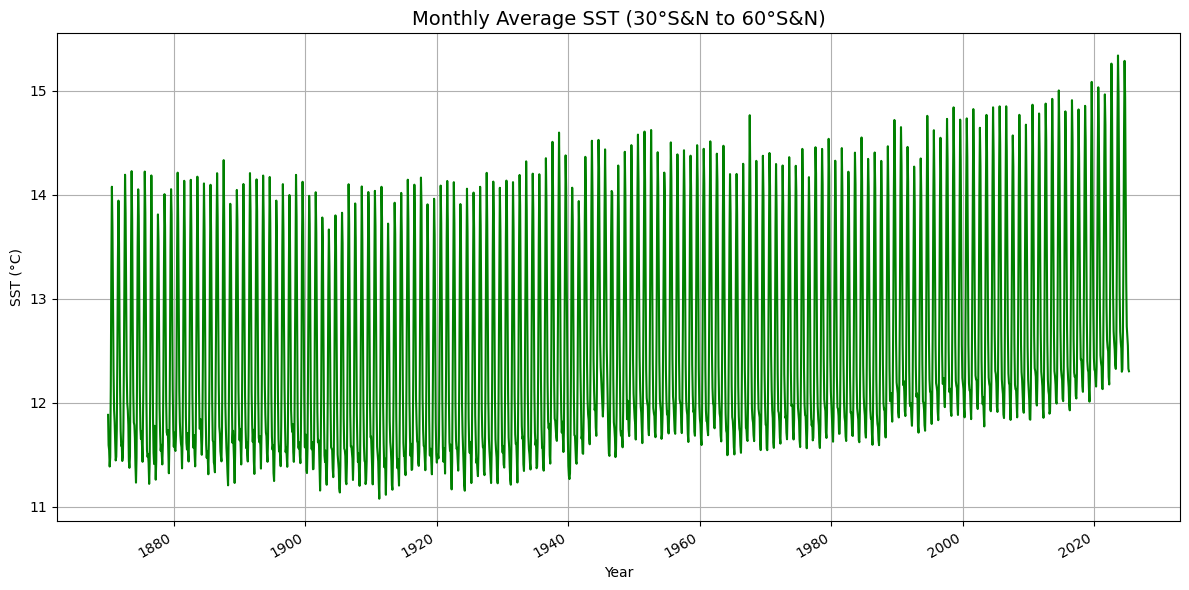

In [7]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

file_path = '/Users/yutanzhang/Desktop/SST/HadISST_sst.nc'
ds = nc.Dataset(file_path)

sst_raw = ds.variables['sst'][:]
lat = ds.variables['latitude'][:]
lon = ds.variables['longitude'][:]
time = ds.variables['time']
time_units = time.units
calendar = getattr(time, 'calendar', 'standard')

dates_raw = nc.num2date(time[:], units=time_units, calendar=calendar)
dates = np.array([datetime(d.year, d.month, d.day) for d in dates_raw])

fill_value = getattr(ds.variables['sst'], '_FillValue', 1e20)
sst = np.ma.masked_where((sst_raw == fill_value) | (sst_raw > 1e10) | (sst_raw < -10), sst_raw)

def compute_band_sst(lat_bounds):
    lat_mask = (lat >= lat_bounds[0]) & (lat <= lat_bounds[1])
    sst_band = sst[:, lat_mask, :]
    lat_band = lat[lat_mask]

    deg_to_rad = np.pi / 180.0
    lat_grid, lon_grid = np.meshgrid(lat_band, lon, indexing='ij')
    lat_abs = np.abs(lat_grid)
    weights = (np.sin((lat_abs + 0.5) * deg_to_rad) - np.sin((lat_abs - 0.5) * deg_to_rad)) / 720

    sst_monthly = np.empty(sst_band.shape[0])
    weight_sums = np.empty(sst_band.shape[0])
    
    for t in range(sst_band.shape[0]):
        sst_t = sst_band[t, :, :]
        w_t = np.ma.array(weights, mask=sst_t.mask)
        if np.sum(~w_t.mask) < 10:
            sst_monthly[t] = np.nan
            weight_sums[t] = np.nan
        else:
            w_t_sum = np.sum(w_t)
            w_t /= w_t_sum
            sst_monthly[t] = np.ma.average(sst_t, weights=w_t)
            weight_sums[t] = w_t_sum
    return sst_monthly, weight_sums

sst_30N_60N, w_north = compute_band_sst((30, 60))
sst_30S_60S, w_south = compute_band_sst((-60, -30))

combined_sst = np.empty_like(sst_30N_60N)
for t in range(len(combined_sst)):
    if np.isnan(sst_30N_60N[t]) or np.isnan(sst_30S_60S[t]):
        combined_sst[t] = np.nan
    else:
        total_weight = w_north[t] + w_south[t]
        combined_sst[t] = (sst_30N_60N[t] * w_north[t] + sst_30S_60S[t] * w_south[t]) / total_weight

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(dates, combined_sst, label='Combined SST (30°S–60°N)', color='green', linewidth=1.5)
ax.set_title('Monthly Average SST (30°S&N to 60°S&N)', fontsize=14)
ax.set_xlabel('Year')
ax.set_ylabel('SST (°C)')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
fig.autofmt_xdate()
ax.grid(True)
plt.tight_layout()
plt.show()

ds.close()

30S to 60S and 30N to 60N sst per year

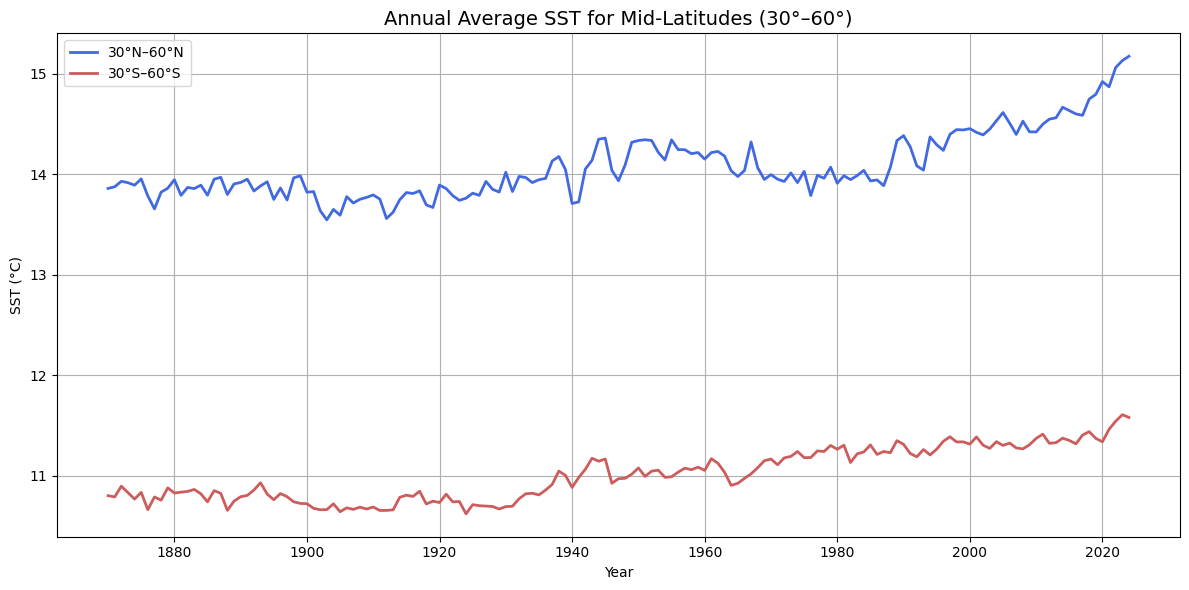

In [8]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# === Load the NetCDF data ===
file_path = '/Users/yutanzhang/Desktop/SST/HadISST_sst.nc'
ds = nc.Dataset(file_path)

# === Extract variables ===
sst_raw = ds.variables['sst'][:]               # (time, lat, lon)
lat = ds.variables['latitude'][:]
lon = ds.variables['longitude'][:]
time = ds.variables['time']
time_units = time.units
calendar = getattr(time, 'calendar', 'standard')

# === Convert time to datetime.datetime and extract years ===
dates_raw = nc.num2date(time[:], units=time_units, calendar=calendar)
dates = np.array([datetime(d.year, d.month, d.day) for d in dates_raw])
years = np.array([d.year for d in dates])

# === Handle fill values ===
fill_value = getattr(ds.variables['sst'], '_FillValue', 1e20)
sst = np.ma.masked_where((sst_raw == fill_value) | (sst_raw > 1e10) | (sst_raw < -10), sst_raw)

# === Function to compute monthly SST and weight sums for a latitude band ===
def compute_band_sst(lat_bounds):
    lat_mask = (lat >= lat_bounds[0]) & (lat <= lat_bounds[1])
    sst_band = sst[:, lat_mask, :]
    lat_band = lat[lat_mask]

    deg_to_rad = np.pi / 180.0
    lat_grid, lon_grid = np.meshgrid(lat_band, lon, indexing='ij')
    lat_abs = np.abs(lat_grid)
    weights = (np.sin((lat_abs + 0.5) * deg_to_rad) - np.sin((lat_abs - 0.5) * deg_to_rad)) / 720

    sst_monthly = np.empty(sst_band.shape[0])
    for t in range(sst_band.shape[0]):
        sst_t = sst_band[t, :, :]
        w_t = np.ma.array(weights, mask=sst_t.mask)
        if np.sum(~w_t.mask) < 10:
            sst_monthly[t] = np.nan
        else:
            w_t /= np.sum(w_t)
            sst_monthly[t] = np.ma.average(sst_t, weights=w_t)
    return sst_monthly

# === Compute monthly SSTs for each band ===
sst_30N_60N_monthly = compute_band_sst((30, 60))
sst_30S_60S_monthly = compute_band_sst((-60, -30))

# === Compute annual averages ===
unique_years = np.arange(years.min(), years.max() + 1)
sst_30N_60N_annual = []
sst_30S_60S_annual = []

for y in unique_years:
    mask = (years == y)
    north_vals = sst_30N_60N_monthly[mask]
    south_vals = sst_30S_60S_monthly[mask]
    sst_30N_60N_annual.append(np.nanmean(north_vals) if np.sum(~np.isnan(north_vals)) >= 6 else np.nan)
    sst_30S_60S_annual.append(np.nanmean(south_vals) if np.sum(~np.isnan(south_vals)) >= 6 else np.nan)

sst_30N_60N_annual = np.array(sst_30N_60N_annual)
sst_30S_60S_annual = np.array(sst_30S_60S_annual)

# === Plotting ===
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(unique_years, sst_30N_60N_annual, label='30°N–60°N', color='royalblue', linewidth=2)
ax.plot(unique_years, sst_30S_60S_annual, label='30°S–60°S', color='indianred', linewidth=2)
ax.set_title('Annual Average SST for Mid-Latitudes (30°–60°)', fontsize=14)
ax.set_xlabel('Year')
ax.set_ylabel('SST (°C)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

# === Cleanup ===
ds.close()